# Contextual Analysis

What is the number of locations, service settings, context types, national categories, and appointment statuses in the data sets?

In [1]:
import pandas as pd

# Load all the CSV files
actual_duration_data = pd.read_csv('actual_duration.csv')
appointments_regional_data = pd.read_csv('appointments_regional.csv')
national_categories_data = pd.read_csv('national_categories.csv')

# Get the total values for each individual field
unique_locations = actual_duration_data['sub_icb_location_code'].nunique()
unique_service_settings = national_categories_data['service_setting'].nunique()
unique_context_types = national_categories_data['context_type'].nunique()
unique_national_categories = national_categories_data['national_category'].nunique()
unique_appointment_statuses = appointments_regional_data['appointment_status'].nunique()

# Print results
print(f"Number of unique locations: {unique_locations}")
print(f"Number of unique service settings: {unique_service_settings}")
print(f"Number of unique context types: {unique_context_types}")
print(f"Number of unique national categories: {unique_national_categories}")
print(f"Number of unique appointment statuses: {unique_appointment_statuses}")

C:\Users\ryano\AppData\Local\Temp\ipykernel_16688\460529880.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  actual_duration_data = pd.read_csv('actual_duration.csv')


Number of unique locations: 106
Number of unique service settings: 5
Number of unique context types: 3
Number of unique national categories: 18
Number of unique appointment statuses: 2


What is the date range of the provided data sets, and which service settings reported the most appointments for a specific period?

In [17]:
import pandas as pd

# Function to ensure uniform date format
def uniform_date_format(data, date_column):
    data[date_column] = pd.to_datetime(data[date_column], errors='coerce')

# Function to get date range
def get_date_range(data, date_column):
    date_series = data[date_column].dropna()
    return (date_series.min(), date_series.max())

# Load the CSV files
actual_duration_data = pd.read_csv('actual_duration.csv')
appointments_regional_data = pd.read_csv('appointments_regional.csv')
national_categories_data = pd.read_csv('national_categories.csv')

# Ensure uniform date format
uniform_date_format(actual_duration_data, 'appointment_date')
uniform_date_format(appointments_regional_data, 'appointment_month')
uniform_date_format(national_categories_data, 'appointment_date')

# Get date range for each dataset
actual_duration_date_range = get_date_range(actual_duration_data, 'appointment_date')
appointments_regional_date_range = get_date_range(appointments_regional_data, 'appointment_month')
national_categories_date_range = get_date_range(national_categories_data, 'appointment_date')

# Print the results in a user-friendly format
print("Date range for actual_duration dataset:")
print(f"   Start Date: {actual_duration_date_range[0].strftime('%Y-%m-%d')}")
print(f"   End Date: {actual_duration_date_range[1].strftime('%Y-%m-%d')}\n")

print("Date range for appointments_regional dataset:")
print(f"   Start Date: {appointments_regional_date_range[0].strftime('%Y-%m-%d')}")
print(f"   End Date: {appointments_regional_date_range[1].strftime('%Y-%m-%d')}\n")

print("Date range for national_categories dataset:")
print(f"   Start Date: {national_categories_date_range[0].strftime('%Y-%m-%d')}")
print(f"   End Date: {national_categories_date_range[1].strftime('%Y-%m-%d')}")

C:\Users\ryano\AppData\Local\Temp\ipykernel_16688\647232071.py:13: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  actual_duration_data = pd.read_csv('actual_duration.csv')


Date range for actual_duration dataset:
   Start Date: 2021-12-01
   End Date: 2022-06-30

Date range for appointments_regional dataset:
   Start Date: 2020-01-01
   End Date: 2022-06-01

Date range for national_categories dataset:
   Start Date: 2021-01-08
   End Date: 2022-12-06


C:\Users\ryano\AppData\Local\Temp\ipykernel_16688\647232071.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data[date_column] = pd.to_datetime(data[date_column], errors='coerce')


# Question 1: Has there been adequate staff and capacity in the networks?

Which service settings reported the most appointments for a specific period?

C:\Users\ryano\AppData\Local\Temp\ipykernel_16688\806984405.py:5: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  actual_duration_data = pd.read_csv('actual_duration.csv')
C:\Users\ryano\AppData\Local\Temp\ipykernel_16688\806984405.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  national_categories_data['appointment_date'] = pd.to_datetime(national_categories_data['appointment_date'])


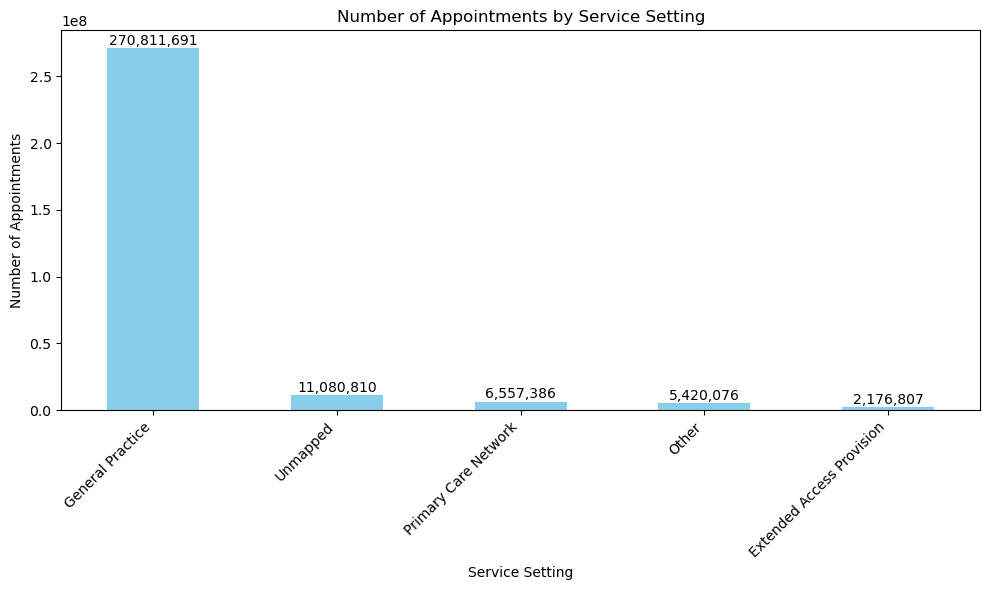

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load all the CSV files
actual_duration_data = pd.read_csv('actual_duration.csv')
appointments_regional_data = pd.read_csv('appointments_regional.csv')
national_categories_data = pd.read_csv('national_categories.csv')

# Convert 'appointment_date' to have uniform date
actual_duration_data['appointment_date'] = pd.to_datetime(actual_duration_data['appointment_date'])
national_categories_data['appointment_date'] = pd.to_datetime(national_categories_data['appointment_date'])

# Identify the service setting that reported the most appointments during the specified period
most_appointments_service_setting = national_categories_data.loc[
    national_categories_data['count_of_appointments'].idxmax(), 'service_setting'
]

# Identify the service setting that reported the most appointments for a specific period
most_appointments_service_setting = national_categories_data.loc[
    national_categories_data['count_of_appointments'].idxmax(), 'service_setting'
]

# Plotting appointments by service setting
appointments_by_service_setting = national_categories_data.groupby('service_setting')['count_of_appointments'].sum()
appointments_by_service_setting = appointments_by_service_setting.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
appointments_by_service_setting.plot(kind='bar', color='skyblue')
plt.title('Number of Appointments by Service Setting')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45, ha='right')

# Annotate with detailed y-axis values
for i, value in enumerate(appointments_by_service_setting):
    plt.text(i, value + 50000, f'{value:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

What is the number of appointments and records per month?

C:\Users\ryano\AppData\Local\Temp\ipykernel_16688\2865201298.py:6: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  actual_duration_data = pd.read_csv('actual_duration.csv')
C:\Users\ryano\AppData\Local\Temp\ipykernel_16688\2865201298.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  national_categories_data['appointment_date'] = pd.to_datetime(national_categories_data['appointment_date'])


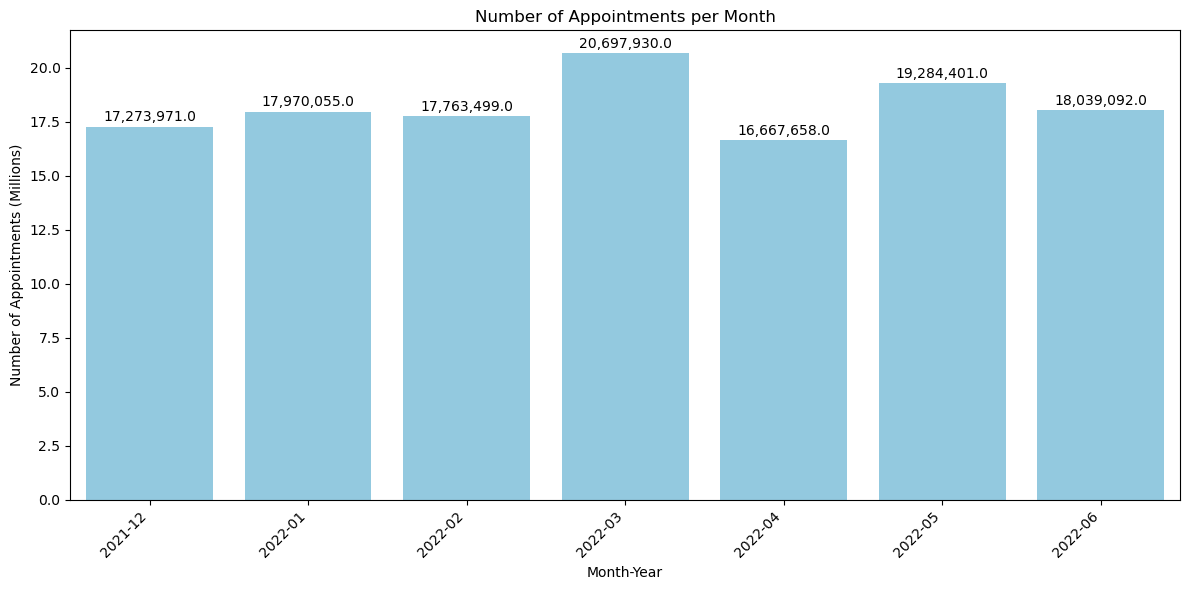


Appointments per Month:
month_year
2021-12    17273971.0
2022-01    17970055.0
2022-02    17763499.0
2022-03    20697930.0
2022-04    16667658.0
2022-05    19284401.0
2022-06    18039092.0
Freq: M, Name: count_of_appointments, dtype: float64

Total Appointments:
127696606.0


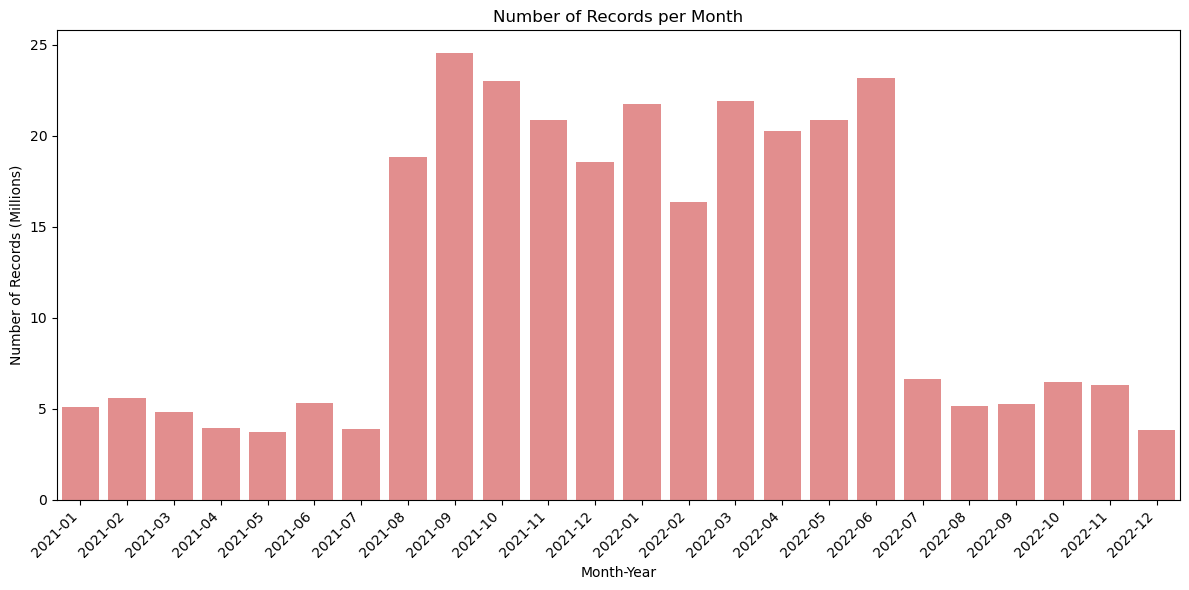


Records per Month:
month_year
2021-01     5114706
2021-02     5563415
2021-03     4832974
2021-04     3967935
2021-05     3720907
2021-06     5291648
2021-07     3896738
2021-08    18812669
2021-09    24561648
2021-10    23022376
2021-11    20871832
2021-12    18567504
2022-01    21736573
2022-02    16333298
2022-03    21879955
2022-04    20279088
2022-05    20843095
2022-06    23150824
2022-07     6606622
2022-08     5142039
2022-09     5250058
2022-10     6450754
2022-11     6326919
2022-12     3823193
Freq: M, Name: count_of_appointments, dtype: int64

Total Records:
296046770


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
actual_duration_data = pd.read_csv('actual_duration.csv')
appointments_regional_data = pd.read_csv('appointments_regional.csv')
national_categories_data = pd.read_csv('national_categories.csv')

# Convert 'appointment_date' to datetime format for analysis
actual_duration_data['appointment_date'] = pd.to_datetime(actual_duration_data['appointment_date'])
national_categories_data['appointment_date'] = pd.to_datetime(national_categories_data['appointment_date'])

# Extract month and year for grouping
actual_duration_data['month_year'] = actual_duration_data['appointment_date'].dt.to_period('M')
national_categories_data['month_year'] = national_categories_data['appointment_date'].dt.to_period('M')

# Calculate the number of appointments and records per month
appointments_per_month = actual_duration_data.groupby('month_year')['count_of_appointments'].sum()
records_per_month = national_categories_data.groupby('month_year')['count_of_appointments'].sum()

# Plotting appointments per month
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=appointments_per_month.index.astype(str), y=appointments_per_month / 1e6, color='skyblue')
plt.title('Number of Appointments per Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Appointments (Millions)')
plt.xticks(rotation=45, ha='right')

# Annotate with detailed y-axis values
for i, value in enumerate(appointments_per_month):
    bar_plot.text(i, value / 1e6 + 0.1, f'{value:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print data for each month
print("\nAppointments per Month:")
print(appointments_per_month)

# Print total sum
print("\nTotal Appointments:")
print(appointments_per_month.sum())

# Plotting records per month
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=records_per_month.index.astype(str), y=records_per_month / 1e6, color='lightcoral')
plt.title('Number of Records per Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Records (Millions)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print data for each month
print("\nRecords per Month:")
print(records_per_month)

# Print total sum
print("\nTotal Records:")
print(records_per_month.sum())

What is the monthly distribution of appointments and percentage of missed appointments?

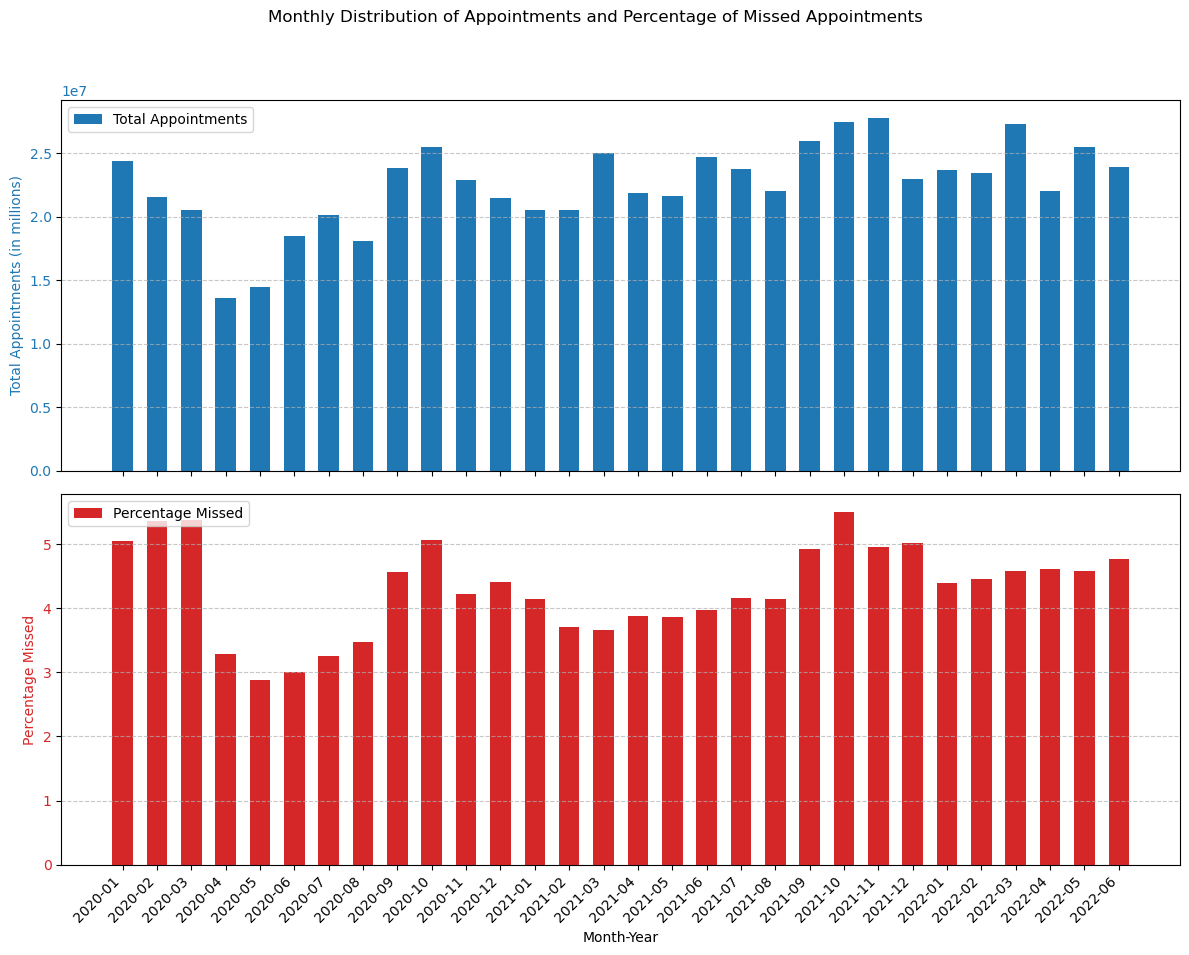

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the appointments_regional dataset
appointments_regional_data = pd.read_csv('appointments_regional.csv')

# Group data by month and calculate the total count of appointments and missed appointments
monthly_total_appointments = appointments_regional_data.groupby('appointment_month')['count_of_appointments'].sum()
monthly_missed_appointments = appointments_regional_data[appointments_regional_data['appointment_status'] == 'DNA'].groupby('appointment_month')['count_of_appointments'].sum()

# Combine total and missed appointments
monthly_appointments = pd.DataFrame({
    'Total Appointments': monthly_total_appointments,
    'Missed Appointments': monthly_missed_appointments
})

# Calculate the percentage of missed appointments
monthly_appointments['Percentage Missed'] = (monthly_appointments['Missed Appointments'] / monthly_appointments['Total Appointments']) * 100

# Plot the distribution of monthly appointment counts and percentage of missed appointments as bar charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Bar chart for total appointments
bars1 = ax1.bar(monthly_appointments.index, monthly_appointments['Total Appointments'], color='tab:blue', label='Total Appointments', width=0.6)
ax1.set_ylabel('Total Appointments (in millions)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Bar chart for percentage of missed appointments
bars2 = ax2.bar(monthly_appointments.index, monthly_appointments['Percentage Missed'], color='tab:red', label='Percentage Missed', width=0.6)
ax2.set_ylabel('Percentage Missed', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper left')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Set common x-axis labels
ax2.set_xlabel('Month-Year')

fig.suptitle('Monthly Distribution of Appointments and Percentage of Missed Appointments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Question 2: What was the actual utilisation of resources?

What comparisons can be made between appointment type, appointment Status and healthcare professional type? Are the appointment types being well utilised?

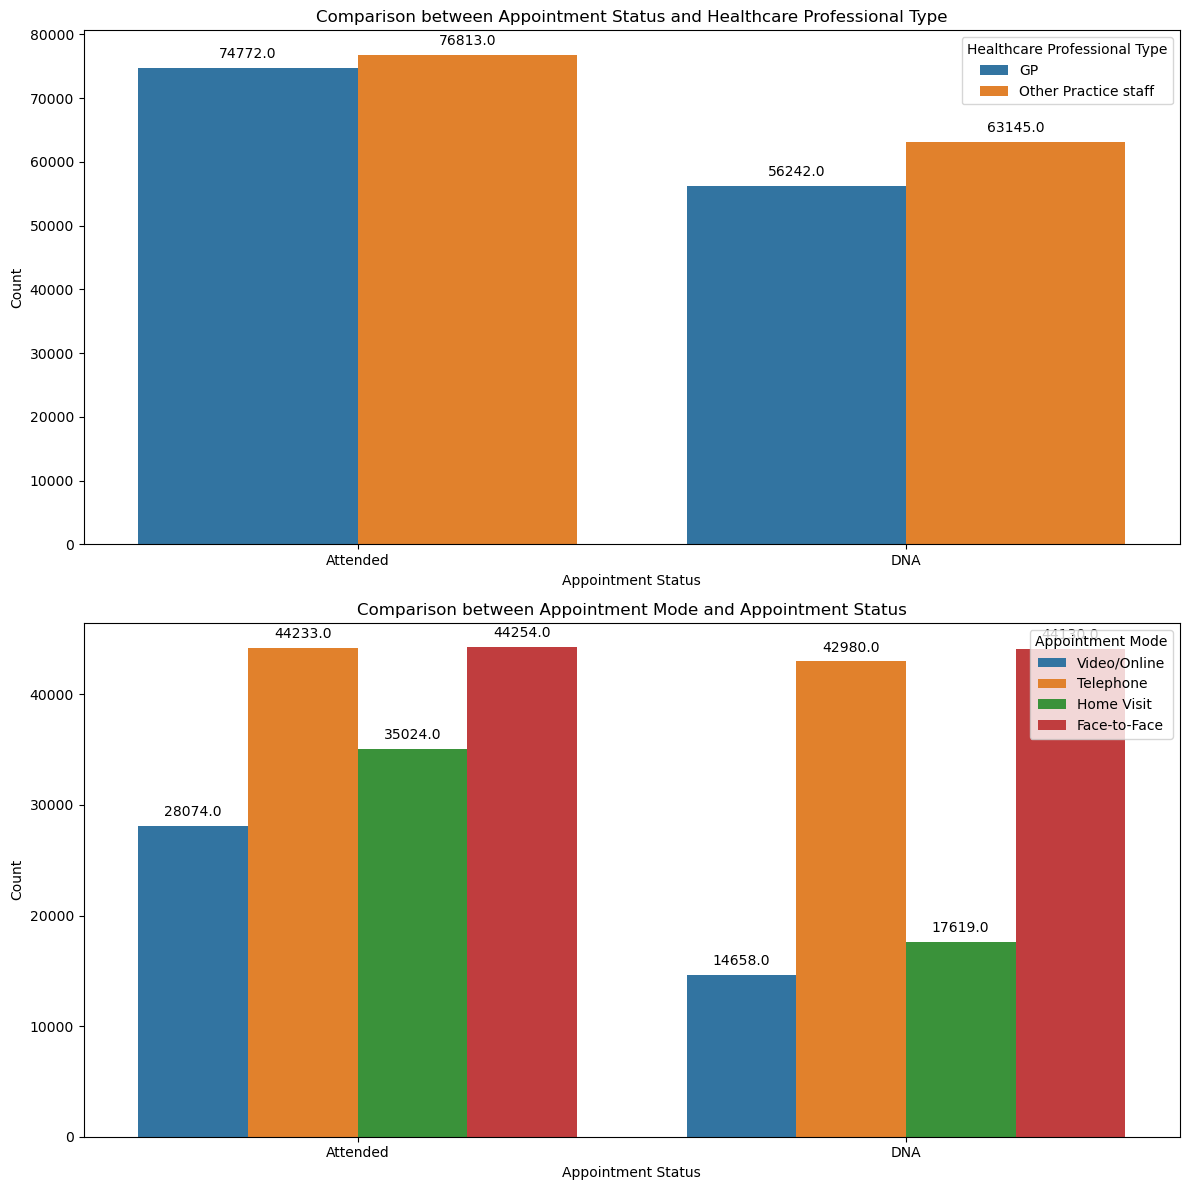

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the appointments_regional dataset
appointments_regional_data = pd.read_csv('appointments_regional.csv')

# Set up the subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Comparison between appointment_status and hcp_type
sns.countplot(x='appointment_status', hue='hcp_type', data=appointments_regional_data, ax=axes[0])
axes[0].set_title('Comparison between Appointment Status and Healthcare Professional Type')
axes[0].set_xlabel('Appointment Status')
axes[0].set_ylabel('Count')
axes[0].legend(title='Healthcare Professional Type', loc='upper right')

# Add figure numbers above each sub-category
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Comparison between appointment_mode and appointment_status
sns.countplot(x='appointment_status', hue='appointment_mode', data=appointments_regional_data, ax=axes[1])
axes[1].set_title('Comparison between Appointment Mode and Appointment Status')
axes[1].set_xlabel('Appointment Status')
axes[1].set_ylabel('Count')
axes[1].legend(title='Appointment Mode', loc='upper right')

# Add figure numbers above each sub-category
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# Question 3: What other resources are available?

What are the top trending hashtags on the supplied Twitter data set and how can this be used in the decision-making process?

Top Trending Hashtags:
#healthcare: 844 occurrences
#health: 86 occurrences
#ai: 47 occurrences
#medicine: 42 occurrences
#job: 38 occurrences
#medical: 35 occurrences
#strategy: 31 occurrences
#digitalhealth: 31 occurrences
#pharmaceutical: 28 occurrences
#medtwitter: 27 occurrences


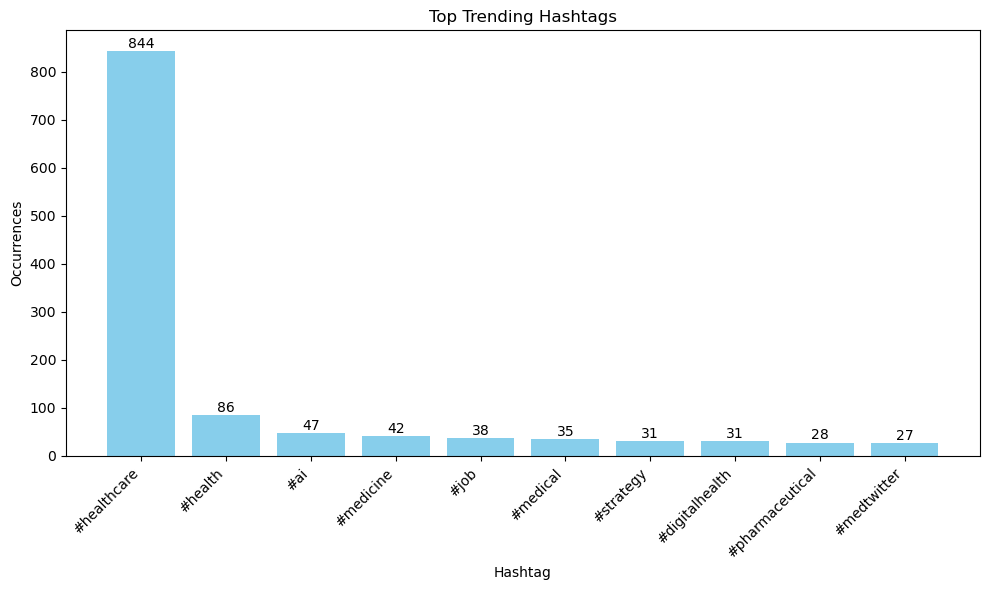

In [6]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt

# Load the Twitter dataset
tweets_data = pd.read_csv('tweets.csv')

# Extract hashtags from the 'tweet_entities_hashtags' column using regular expressions
hashtags = [tag.lower() for entities in tweets_data['tweet_entities_hashtags'] for tag in re.findall(r'#\w+', str(entities))]

# Count the occurrences of each hashtag
hashtags_counter = Counter(hashtags)

# Get the top N hashtags
top_n = 10
top_hashtags = hashtags_counter.most_common(top_n)

# Print and plot the results
print("Top Trending Hashtags:")
for tag, count in top_hashtags:
    print(f"{tag}: {count} occurrences")

# Plot the top hashtags with number values above each bar
plt.figure(figsize=(10, 6))
bar_plot = plt.bar([tag for tag, count in top_hashtags], [count for tag, count in top_hashtags], color='skyblue')
plt.title('Top Trending Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right')

# Annotate with detailed y-axis values
for i, value in enumerate(top_hashtags):
    plt.text(i, value[1] + 0.1, f'{value[1]:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()